In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,LinearRegression,SGDRegressor,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor,DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut,train_test_split
from sklearn import model_selection
from sklearn.cluster import AgglomerativeClustering,hierarchical,KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,PolynomialFeatures,StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from xgboost import XGBRegressor,XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car_sales.csv',index_col=0)#to remove the unnamed column we can either drop it or put index_col=0

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23.0,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,6,3.8,170,4800,1690,No,18.8,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,8,4.9,200,4100,1510,No,18.0,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


In [6]:
df.shape

(93, 27)

In [7]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


In [9]:
df.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [10]:
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [11]:
df.corr()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.376642,0.413485,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
Max.Price,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.247260,0.315315,0.605142
MPG.city,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Fuel.tank.capacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018


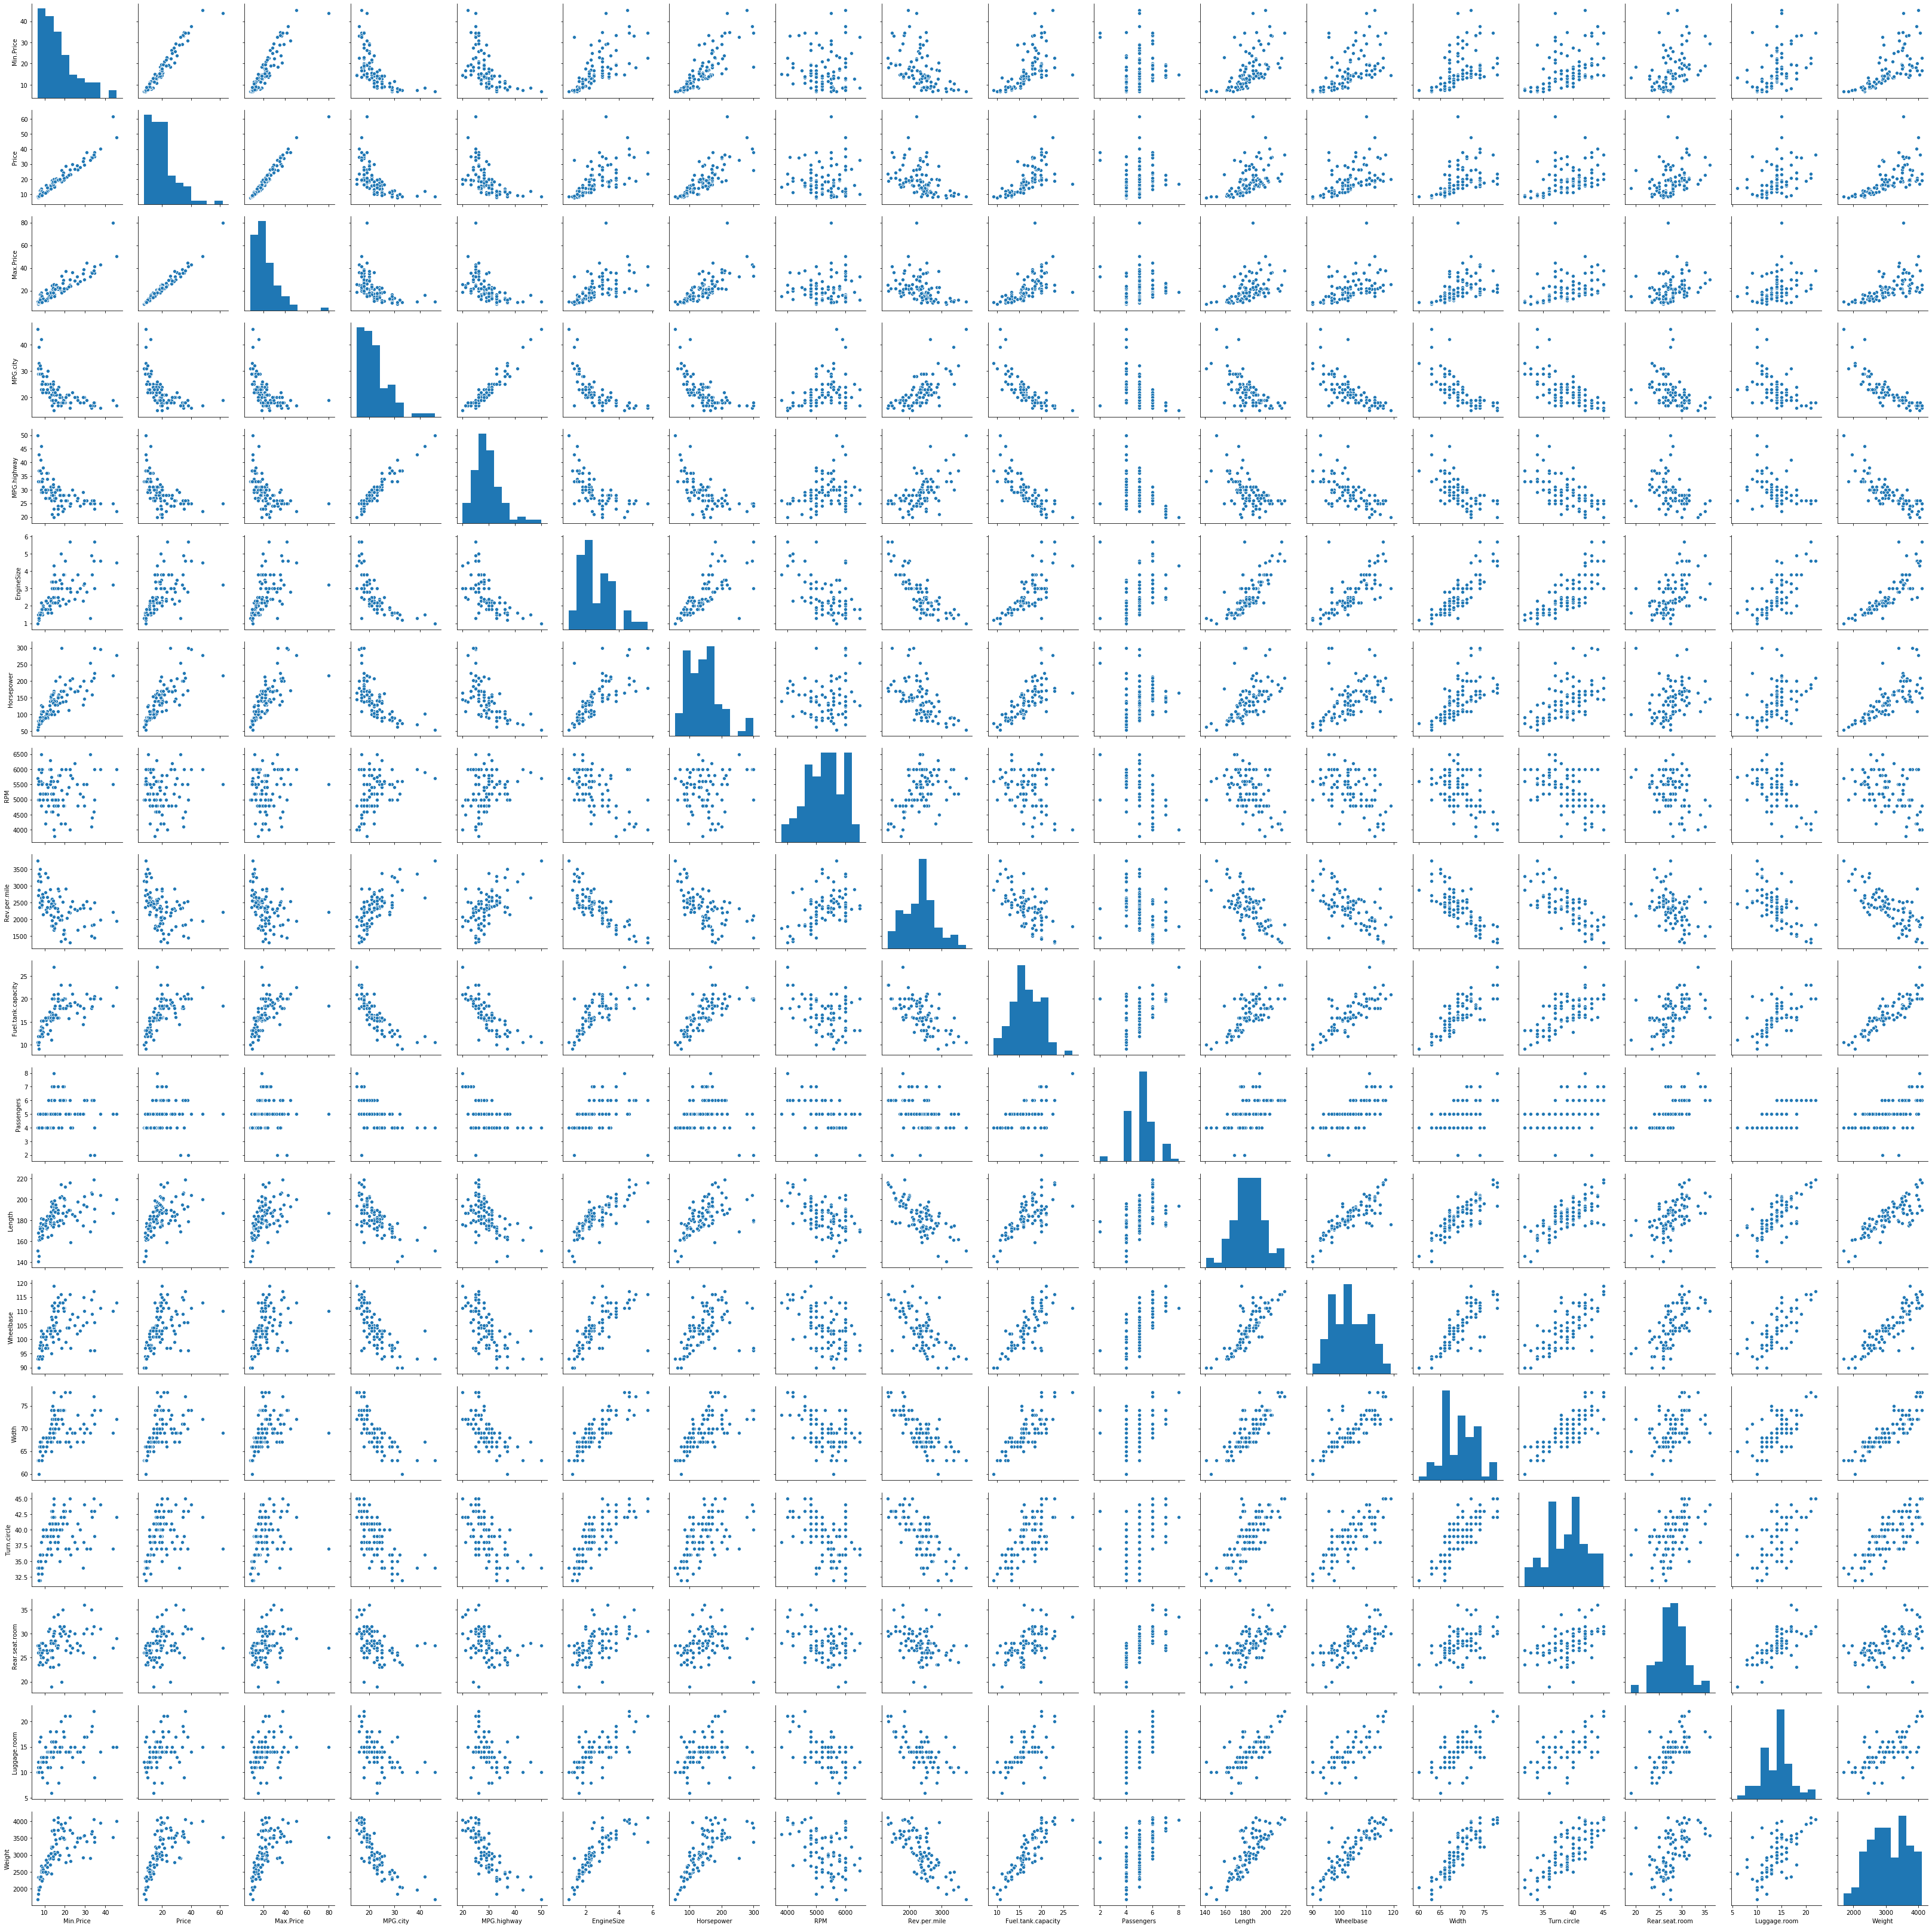

In [12]:
sns.pairplot(df)
plt.show()

In [15]:
B=df.drop(['Manufacturer','Make','Min.Price','Max.Price','Model'],axis=1)
B.head()



,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [16]:
BT=B.groupby(by='Type')
BT_1=BT.get_group('Midsize')
BT_2=BT.get_group('Small')
BT_3=BT.get_group('Compact')
BT_4=BT.get_group('Sporty')
BT_5=BT.get_group('Large')
BT_6=BT.get_group('Van')

In [17]:
from scipy.stats import f_oneway,ttest_ind

In [18]:
f_oneway(BT_1['Price'],BT_2['Price'],BT_3['Price'],BT_4['Price'],BT_5['Price'],BT_6['Price'])

F_onewayResult(statistic=11.531617846935891, pvalue=1.4769990356644984e-08)

P value is less than 0.05 so we can reject the null hypothesis and we can consider 'type' as potential column so we use this in our analysis 

In [19]:
BO=B.groupby(by='Origin')
BO_1=BO.get_group('USA')
BO_2=BO.get_group('non-USA')

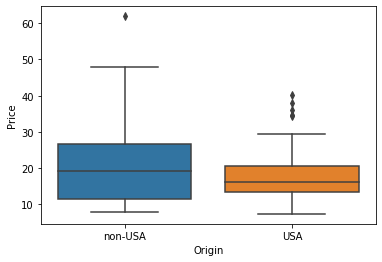

In [20]:
sns.boxplot(df['Origin'],df['Price'])#visually seeing 
plt.show()

In [21]:
ttest_ind(BO_1['Price'],BO_2['Price'])#ttest for 2 independent 

Ttest_indResult(statistic=-0.9655463914123011, pvalue=0.33683021808366587)

P Value is greater than 0.05 so we failed to reject the null hypothesis (probability of null hypothesis is being true is very high 33% it should only be 0.5%) we have to remove the Origin from our analysis

In [22]:
B.drop(['Origin'],axis=1,inplace=True)

In [23]:
BA=B.groupby(by='AirBags')
BA_1=BA.get_group('None')
BA_2=BA.get_group('Driver & Passenger')
BA_3=BA.get_group('Driver only')

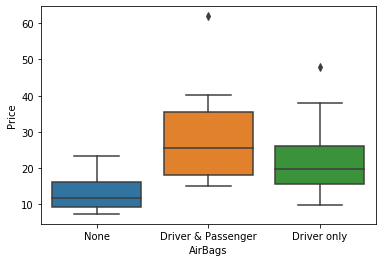

In [24]:
sns.boxplot(df['AirBags'],df['Price'])
plt.show()

In [25]:
f_oneway(BA_1['Price'],BA_2['Price'],BA_3['Price'])

F_onewayResult(statistic=21.177572370824066, pvalue=2.9011868198272043e-08)

p value is less than 0.05 so we can reject the null hypothesis and we can use 'airbags' in our analysis

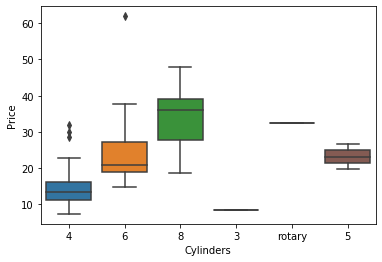

In [26]:
sns.boxplot(df['Cylinders'],df['Price'])
plt.show()
                               

In [27]:
BC=B.groupby(by='Cylinders')
BC_1=BC.get_group('4')
BC_2=BC.get_group('6')
BC_3=BC.get_group('8')
BC_4=BC.get_group('3')
BC_5=BC.get_group('5')
BC_6=BC.get_group('rotary')

In [28]:
f_oneway(BC_1['Price'],BC_2['Price'],BC_3['Price'],BC_4['Price'],BC_5['Price'],BC_6['Price'])

F_onewayResult(statistic=14.36328753683352, pvalue=3.042776105990462e-10)

P value less than 0.05 so reject the null hypothesis and 'cylinder' is used in our analysis

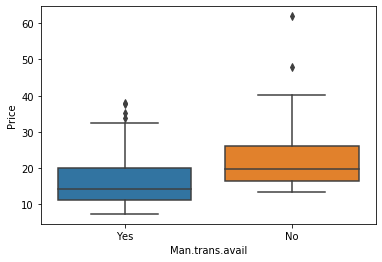

In [29]:
sns.boxplot(df['Man.trans.avail'],df['Price'])
plt.show()

In [30]:
BM=B.groupby(by='Man.trans.avail')
BM_1=BM.get_group('Yes')
BM_2=BM.get_group('No')

In [31]:
ttest_ind(BM_1['Price'],BM_2['Price'])

Ttest_indResult(statistic=-3.2952476009261162, pvalue=0.0014025458777908683)

p value is less than 0.05 reject the null hypothesis and we can use 'Man.trans.avail' for our analysis

In [32]:
B['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

In [33]:
B.corr()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Price,1.000000,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,-0.326504,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.311499,0.366569,0.647179
MPG.city,-0.594562,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,0.444210,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.384347,-0.494894,-0.843139
MPG.highway,-0.560680,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,0.404419,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.366684,-0.371629,-0.810658
EngineSize,0.597425,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,-0.634686,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.502750,0.680827,0.845075
Horsepower,0.788218,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,-0.353033,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.256732,0.359217,0.738798
RPM,-0.004955,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,0.430192,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.342175,-0.524845,-0.427931
Rev.per.mile,-0.426395,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,0.599297,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.377010,-0.592792,-0.735264
Man.trans.avail,-0.326504,0.444210,0.404419,-0.634686,-0.353033,0.430192,0.599297,1.000000,-0.483223,-0.574892,-0.645906,-0.653101,-0.626017,-0.616887,-0.460276,-0.614393,-0.612110
Fuel.tank.capacity,0.619480,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,-0.483223,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.509689,0.613437,0.894018
Passengers,0.057860,-0.416856,-0.466386,0.372721,0.009264,-0.467138,-0.334976,-0.574892,0.472095,1.000000,0.485294,0.694054,0.489979,0.449025,0.694134,0.653317,0.553273


# Handling Null values

As the missing values are less than 10 percent compared to the size of the data we can use the median to impute null values

In [46]:
B['Rear.seat.room'].fillna(B['Rear.seat.room'].median(),inplace=True)
B['Luggage.room'].fillna(B['Luggage.room'].median(),inplace=True)

# converting object to int by dummies

In [47]:
#Method 1

#Dummies for air bags
B_airbags=pd.get_dummies(B['AirBags'])
B_update=pd.concat([B,B_airbags],axis=1)


#Dummies for Drive Train
B_DT=pd.get_dummies(B['DriveTrain'])
B_update=pd.concat([B_update,B_DT],axis=1)


#Dummies for Cylinders
B_cyl=pd.get_dummies(B['Cylinders'])
B_update=pd.concat([B_update,B_cyl],axis=1)

#Dummies for Type
B_type=pd.get_dummies(B['Type'])
B_update=pd.concat([B_update,B_type],axis=1)

In [48]:
B_update.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Driver & Passenger,Driver only,None,4WD,Front,Rear,3,4,5,6,8,rotary,Compact,Large,Midsize,Small,Sporty,Van
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [49]:
B_update.shape

(93, 39)

In [50]:
#Method 2

B_new=pd.get_dummies(B,prefix=['Type','AirBags','DriveTrain','Cylinders'])
B_new.head()

,Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary
1,15.9,25,31,1.8,140,6300,2890,1,13.2,5,177,102,68,37,26.5,11.0,2705,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,33.9,18,25,3.2,200,5500,2335,1,18.0,5,195,115,71,38,30.0,15.0,3560,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,29.1,20,26,2.8,172,5500,2280,1,16.9,5,180,102,67,37,28.0,14.0,3375,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
4,37.7,19,26,2.8,172,5500,2535,1,21.1,6,193,106,70,37,31.0,17.0,3405,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
5,30.0,22,30,3.5,208,5700,2545,1,21.1,4,186,109,69,39,27.0,13.0,3640,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [51]:
B_new.shape

(93, 35)

# Building the Model

In [94]:
X=B_new.drop('Price',axis=1)
Y=B_new['Price']

In [95]:
X_constant = sm.add_constant(x)
model = sm.OLS(y, X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     11.58
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           7.07e-16
Time:                        13:20:27   Log-Likelihood:                -254.62
No. Observations:                  93   AIC:                             571.2
Df Residuals:                      62   BIC:                             649.7
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         50.9069     16.589      3.069      0.003      17.747      84.067
MPG.city                      -0.3884      0.422     -0.921      0.361      -1.232       0.455
MPG.highway                    0.1755      0.389      0.451      0.654      -0.602       0.953
EngineSize                    -1.2432      2.692     -0.462      0.646      -6.625       4.139
Horsepower                     0.1450      0.044      3.319      0.002       0.058       0.232
RPM                           -0.0022      0.002     -1.016      0.314      -0.007       0.002
Rev.per.mile                   0.0017      0.002      0.751      0.456      -0.003       0.006
Man.trans.avail               -1.8507      2.083     -0.889      0.378      -6.014       2.313
Fuel.tank.capacity             0.4645      0.475      0.979      0.331      -0.484       1.413
Passengers                     0.9858      1.585      0.622      0.536      -2.182       4.153
Length                         0.0530      0.107      0.494      0.623      -0.162       0.268
Wheelbase                      0.3172      0.252      1.259      0.213      -0.187       0.821
Width                         -1.7723      0.488     -3.631      0.001      -2.748      -0.797
Turn.circle                   -0.7228      0.336     -2.149      0.036      -1.395      -0.050
Rear.seat.room                 0.4891      0.319      1.532      0.131      -0.149       1.127
Luggage.room                   0.2362      0.320      0.739      0.463      -0.403       0.875
Weight                        -0.0027      0.005     -0.559      0.578      -0.012       0.007
Type_Compact                   6.1786      2.466      2.506      0.015       1.250      11.108
Type_Large                     5.9039      4.313      1.369      0.176      -2.717      14.525
Type_Midsize                   9.7521      3.103      3.142      0.003       3.548      15.956
Type_Small                     6.9449      3.193      2.175      0.033       0.563      13.327
Type_Sporty                   10.9210      3.107      3.515      0.001       4.710      17.132
Type_Van                      11.2063      5.671      1.976      0.053      -0.130      22.542
AirBags_Driver & Passenger    20.5476      6.058      3.392      0.001       8.438      32.657
AirBags_Driver only           17.6754      5.452      3.242      0.002       6.777      28.574
AirBags_None                  12.6839      5.315      2.387      0.020       2.060      23.308
DriveTrain_4WD                13.8679      5.434      2.552      0.013       3.005      24.731
DriveTrain_Front              15.9374      5.806      2.745      0.008       4.331      27.543
DriveTrain_Rear               21.1016      5.837      3.615      0.001       9.433      32.770
Cylinders_3                    9.3769      

In [96]:
model.pvalues<0.05

const                          True
MPG.city                      False
MPG.highway                   False
EngineSize                    False
Horsepower                     True
RPM                           False
Rev.per.mile                  False
Man.trans.avail               False
Fuel.tank.capacity            False
Passengers                    False
Length                        False
Wheelbase                     False
Width                          True
Turn.circle                    True
Rear.seat.room                False
Luggage.room                  False
Weight                        False
Type_Compact                   True
Type_Large                    False
Type_Midsize                   True
Type_Small                     True
Type_Sporty                    True
Type_Van                      False
AirBags_Driver & Passenger     True
AirBags_Driver only            True
AirBags_None                   True
DriveTrain_4WD                 True
DriveTrain_Front            

# Quadratic Regression

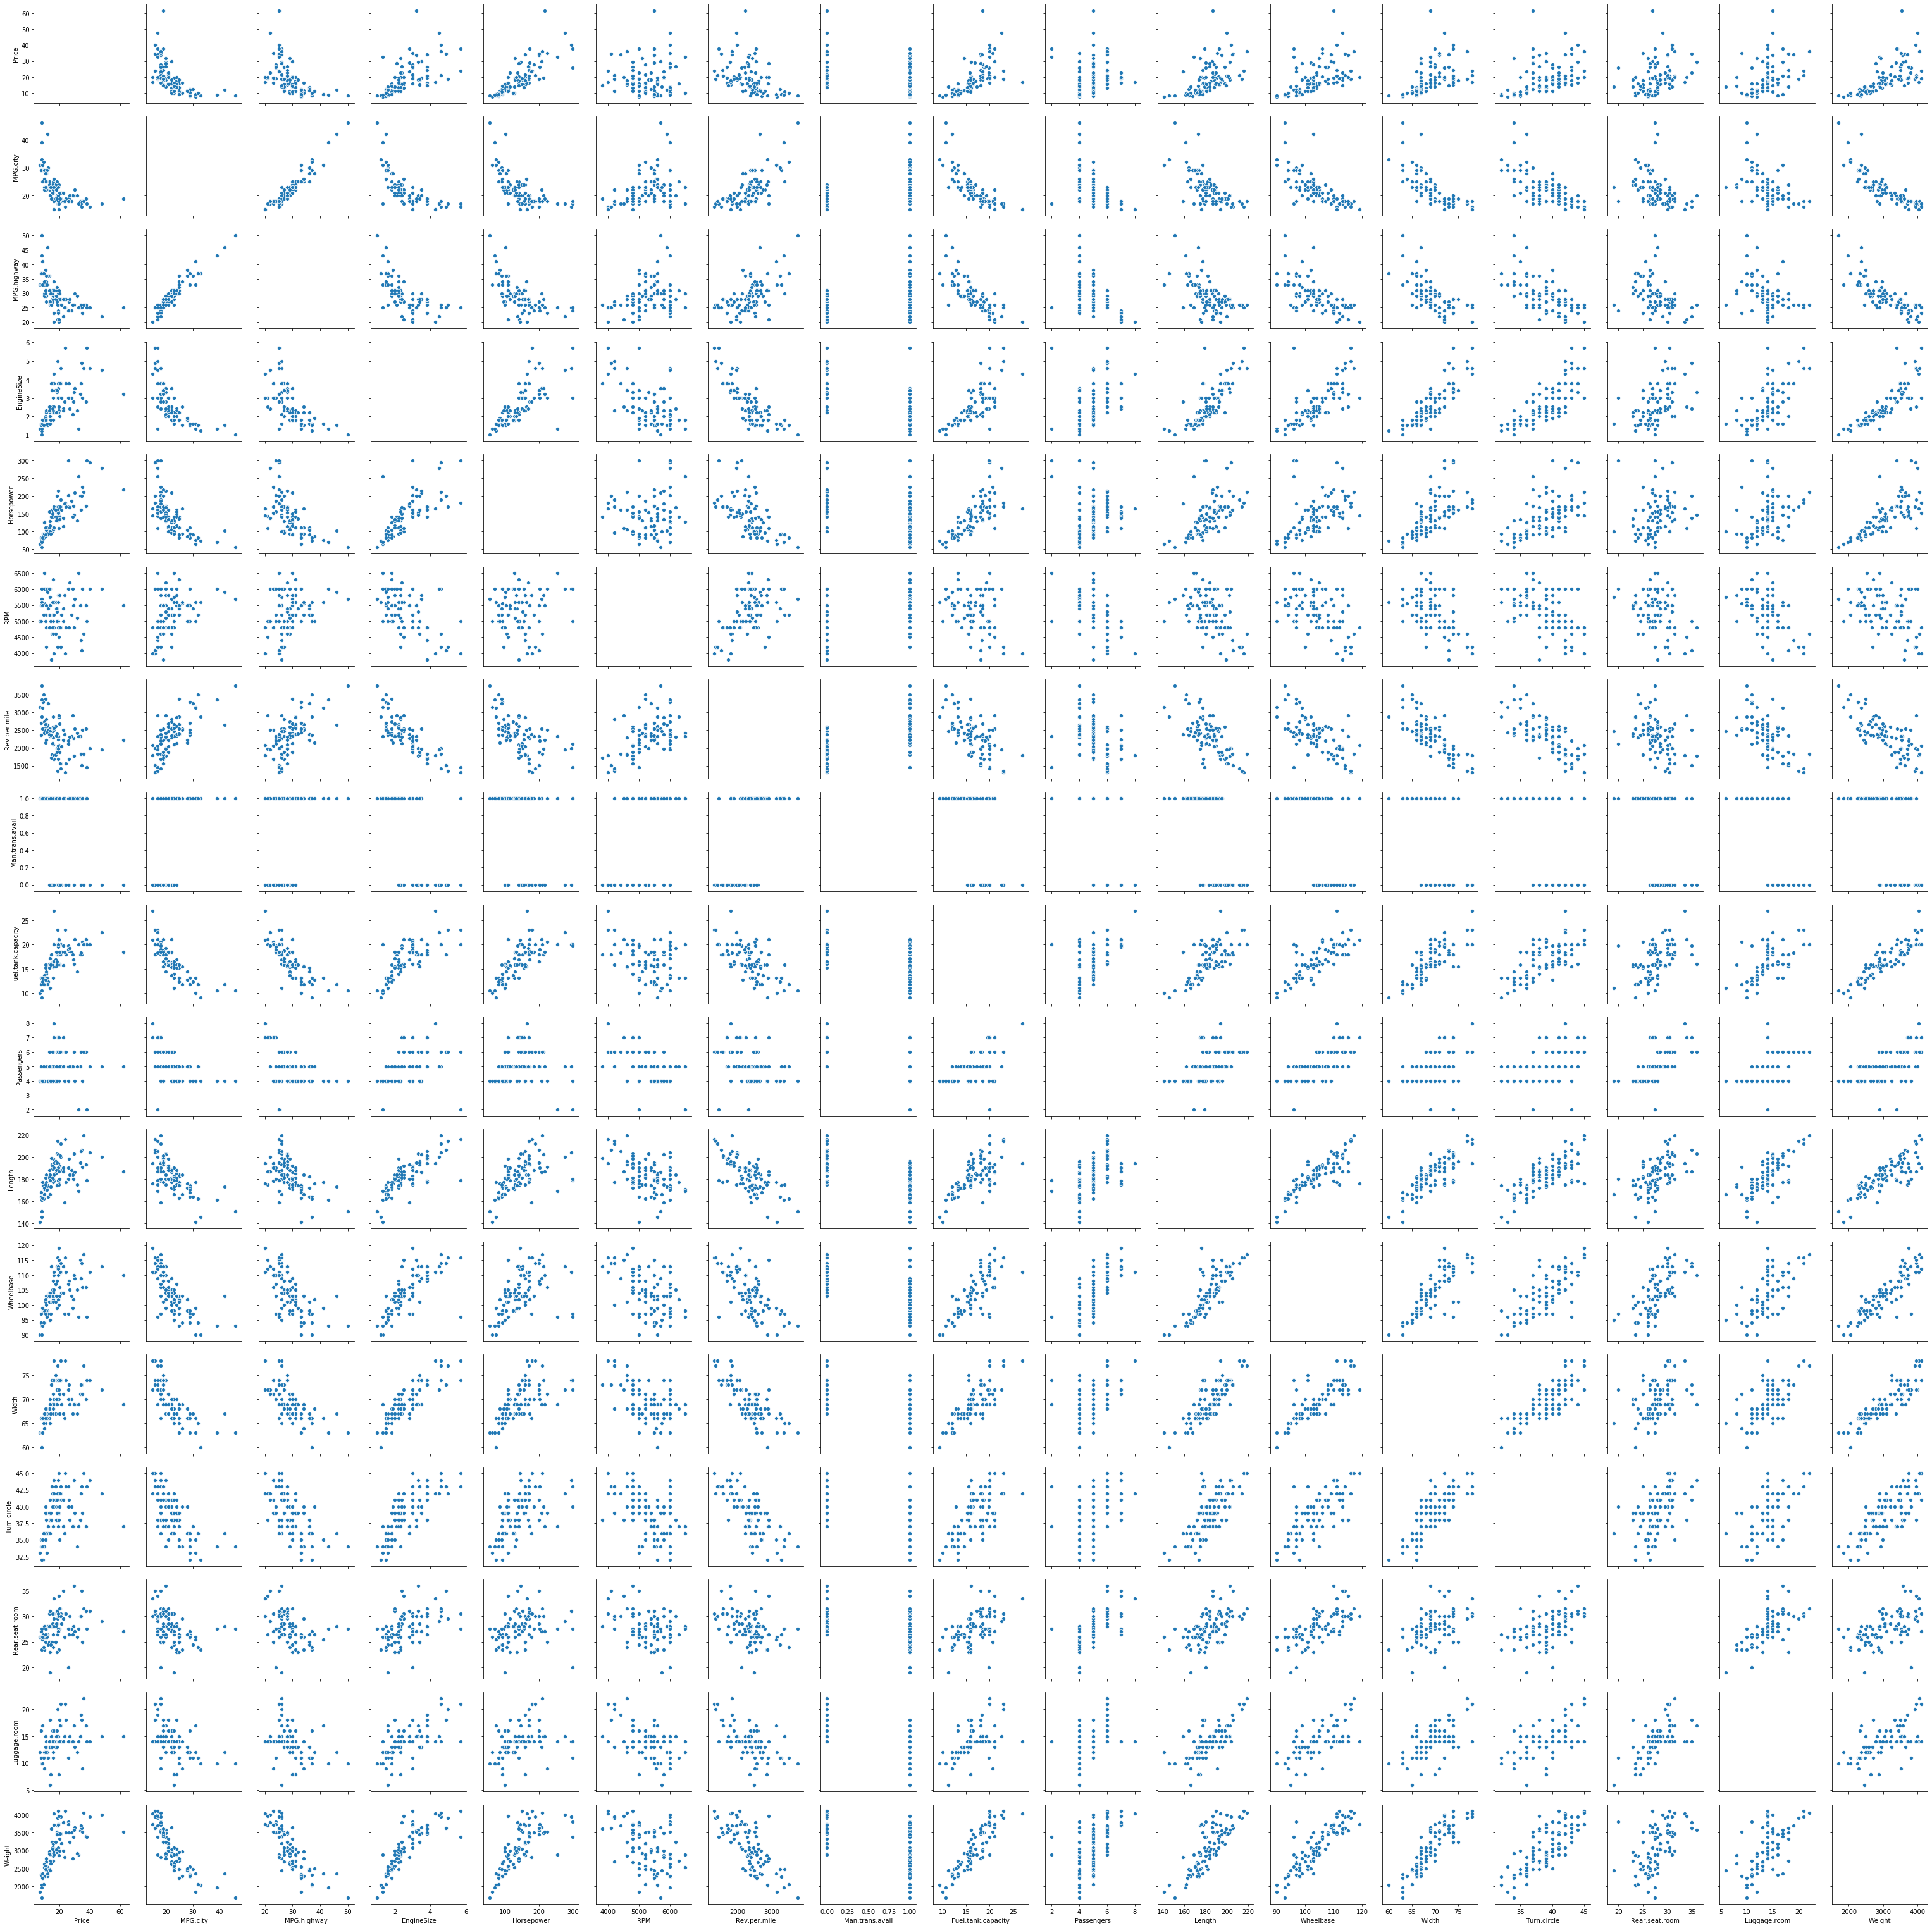

In [55]:
sns.pairplot(B,diag_kind=True)

In [56]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [97]:
X_qr=X[['MPG.city','MPG.highway','Horsepower','Rev.per.mile']]

In [103]:
X.columns

Index(['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM',
       'Rev.per.mile', 'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers',
       'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room',
       'Luggage.room', 'Weight', 'Type_Compact', 'Type_Large', 'Type_Midsize',
       'Type_Small', 'Type_Sporty', 'Type_Van', 'AirBags_Driver & Passenger',
       'AirBags_Driver only', 'AirBags_None', 'DriveTrain_4WD',
       'DriveTrain_Front', 'DriveTrain_Rear', 'Cylinders_3', 'Cylinders_4',
       'Cylinders_5', 'Cylinders_6', 'Cylinders_8', 'Cylinders_rotary'],
      dtype='object')

In [104]:
sc=StandardScaler()
x_std=sc.fit_transform(X_qr)


In [105]:
X_MVLR=X[['Width','Turn.circle','Type_Compact','Type_Sporty','Type_Small','Type_Midsize','Cylinders_4','Cylinders_6','Cylinders_8','AirBags_Driver & Passenger','AirBags_Driver only','AirBags_None','DriveTrain_Front','DriveTrain_Rear','DriveTrain_4WD']]
X_MVLR_std=sc.fit_transform(X_MVLR)


In [106]:
X_MVLR_df=pd.DataFrame(X_MVLR)

In [107]:
X_MVLR.head()

,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,DriveTrain_4WD
1,68,37,0,0,1,0,1,0,0,0,0,1,1,0,0
2,71,38,0,0,0,1,0,1,0,1,0,0,1,0,0
3,67,37,1,0,0,0,0,1,0,0,1,0,1,0,0
4,70,37,0,0,0,1,0,1,0,1,0,0,1,0,0
5,69,39,0,0,0,1,1,0,0,0,1,0,0,1,0


In [108]:
#Quadratic Regression model
qr=PolynomialFeatures(degree=2)
XQR=qr.fit_transform(x_std)
XQR_df=pd.DataFrame(XQR)
XQR_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838
1,1.0,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032
2,1.0,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175
3,1.0,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641
4,1.0,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682


In [109]:
XQR_final=XQR_df.drop([0],axis=1)
XQR_final.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682


In [110]:
idx=np.arange(X_MVLR.shape[0])
X_MVLR.index=idx
XQR_final_2=pd.concat([XQR_final,X_MVLR],axis=1)
XQR_final_2.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,DriveTrain_4WD
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838,68,37,0,0,1,0,1,0,0,0,0,1,1,0,0
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032,71,38,0,0,0,1,0,1,0,1,0,0,1,0,0
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175,67,37,1,0,0,0,0,1,0,0,1,0,1,0,0
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641,70,37,0,0,0,1,0,1,0,1,0,0,1,0,0
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682,69,39,0,0,0,1,1,0,0,0,1,0,0,1,0


In [111]:
test=np.array([1,1,0,1,0,1,1,0,1])
(test-np.mean(test))/np.std(test,ddof=1)

array([ 0.66666667,  0.66666667, -1.33333333,  0.66666667, -1.33333333,
        0.66666667,  0.66666667, -1.33333333,  0.66666667])

In [112]:
XQR_final_2.shape

(93, 29)

In [62]:
QR=LinearRegression()

In [63]:
models=[]
models.append(('QR',QR))

In [114]:
# evaluate each model in turn
results = []

names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(model, XQR_final_2, Y,cv=kfold, scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)l
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))


ValueError: Unknown label type: 'continuous'

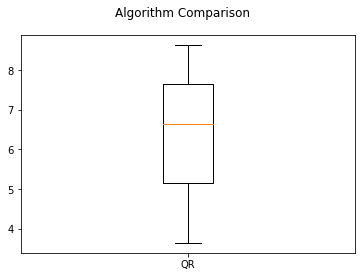

In [65]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Quadratic Model

In [66]:
X_MVLR=x[['Width','Turn.circle','Type_Compact','Type_Sporty','Type_Small','Type_Midsize','Cylinders_4','Cylinders_6','Cylinders_8','DriveTrain_4WD','DriveTrain_Front','DriveTrain_Rear','AirBags_Driver & Passenger','AirBags_Driver only','AirBags_None']]
X_MVLR_std=sc.fit_transform(X_MVLR)

In [67]:
X_MVLR_df=pd.DataFrame(X_MVLR_std)

In [68]:
X_MVLR_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.366184,-0.610436,-0.455842,-0.420969,1.851640,-0.556650,0.947607,-0.707107,-0.285299,-0.347105,0.622944,-0.455842,-0.455842,-0.927362,1.317306
1,0.431983,-0.298510,-0.455842,-0.420969,-0.540062,1.796461,-1.055290,1.414214,-0.285299,-0.347105,0.622944,-0.455842,2.193741,-0.927362,-0.759125
2,-0.632239,-0.610436,2.193741,-0.420969,-0.540062,-0.556650,-1.055290,1.414214,-0.285299,-0.347105,0.622944,-0.455842,-0.455842,1.078328,-0.759125
3,0.165927,-0.610436,-0.455842,-0.420969,-0.540062,1.796461,-1.055290,1.414214,-0.285299,-0.347105,0.622944,-0.455842,2.193741,-0.927362,-0.759125
4,-0.100128,0.013416,-0.455842,-0.420969,-0.540062,1.796461,0.947607,-0.707107,-0.285299,-0.347105,-1.605280,2.193741,-0.455842,1.078328,-0.759125


In [69]:
idx=np.arange(X_MVLR.shape[0])
X_MVLR.index=idx
XQR_final_2=pd.concat([XQR_final,X_MVLR],axis=1)
XQR_final_2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Width,Turn.circle,Type_Compact,Type_Sporty,Type_Small,Type_Midsize,Cylinders_4,Cylinders_6,Cylinders_8,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None
0,0.471312,0.360925,-0.073484,1.129530,0.222135,0.170108,-0.034634,0.532362,0.130267,-0.026522,0.407675,0.005400,-0.083003,1.275838,68,37,0,0,1,0,1,0,0,0,1,0,0,0,1
1,-0.781032,-0.770514,1.078322,0.005661,0.610011,0.601796,-0.842204,-0.004422,0.593691,-0.830862,-0.004362,1.162779,0.006105,0.000032,71,38,0,0,0,1,0,1,0,0,1,0,1,0,0
2,-0.423219,-0.581941,0.540813,-0.105713,0.179115,0.246289,-0.228882,0.044740,0.338655,-0.314721,0.061519,0.292478,-0.057171,0.011175,67,37,1,0,0,0,0,1,0,0,1,0,0,1,0
3,-0.602126,-0.581941,0.540813,0.410659,0.362555,0.350401,-0.325637,-0.247268,0.338655,-0.314721,-0.238979,0.292478,0.222090,0.168641,70,37,0,0,0,1,0,1,0,0,1,0,1,0,0
4,-0.065407,0.172352,1.231897,0.430909,0.004278,-0.011273,-0.080574,-0.028184,0.029705,0.212320,0.074268,1.517569,0.530835,0.185682,69,39,0,0,0,1,1,0,0,0,0,1,0,1,0


In [70]:
XQR_final_2.shape

(93, 29)

In [71]:
QR=LinearRegression()

In [72]:
models = []
models.append(('QR', QR))

QR: 5.707418 (0.606872)


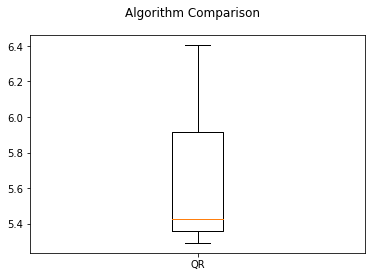

In [73]:
# evaluate the model in turn

results = []

names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits=3 , random_state=0)
    cv_results = model_selection.cross_val_score(model ,XQR_final_2 , y , 
                                                 cv=kfold , scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                          np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


We can see that the error rate is less compared to the previous model 

In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor


# Non Linear Models

In [75]:
LR=LinearRegression()

# KNN Regressor

In [76]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsRegressor()

In [77]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [78]:
knn_params={'n_neighbors':np.arange(3,20),'weights':['uniform','distance']}

In [79]:
GS=GridSearchCV(knn,knn_params,cv=3,scoring='neg_mean_squared_error')

In [80]:
X_scaled=sc.fit_transform(x)

In [81]:
GS.fit(X_scaled,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [82]:
GS.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [83]:
KNN=KNeighborsRegressor(n_neighbors=8,weights='distance')

# Decession Tree

In [84]:
dt=DecisionTreeRegressor(random_state=0)
dt_params={'max_depth':np.arange(1,50),'min_samples_leaf':np.arange(2,15)}

In [85]:
GS_dt=GridSearchCV(dt,dt_params,cv=5,scoring='neg_mean_squared_error')

In [86]:
GS_dt.fit(X_scaled,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 

In [87]:
GS_dt.best_params_

{'max_depth': 3, 'min_samples_leaf': 9}

# Comparing all Non linear models

In [88]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsRegressor(n_neighbors= 5, weights= 'distance')
DT=DecisionTreeRegressor(max_depth= 3, min_samples_leaf= 9,random_state=0)
RF=RandomForestRegressor(n_estimators=100,random_state=0)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=10)
GBoost=GradientBoostingRegressor(n_estimators=800)
stacked=VotingRegressor(estimators=[('GBoost',GBoost),('Boost_RF',AB_RF)])

In [93]:
models = []

models.append(('MVLR',LR))

models.append(('KNNRegressor',knn))

models.append(('DT_Regressor',dt))

models.append(('RF_Regressor',RF))

models.append(('AdaBoost_Regressor',AB_RF))

models.append(('Gradient_Boosting',GBoost))

models.append(('Stacked',stacked))

# evaluate the model in turn

results = []

names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits=5 , random_state=0)
    cv_results = model_selection.cross_val_score(model , X_scaled , y, cv=kfold , scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),
                          np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
    
  


ValueError: Unknown label type: 'continuous'

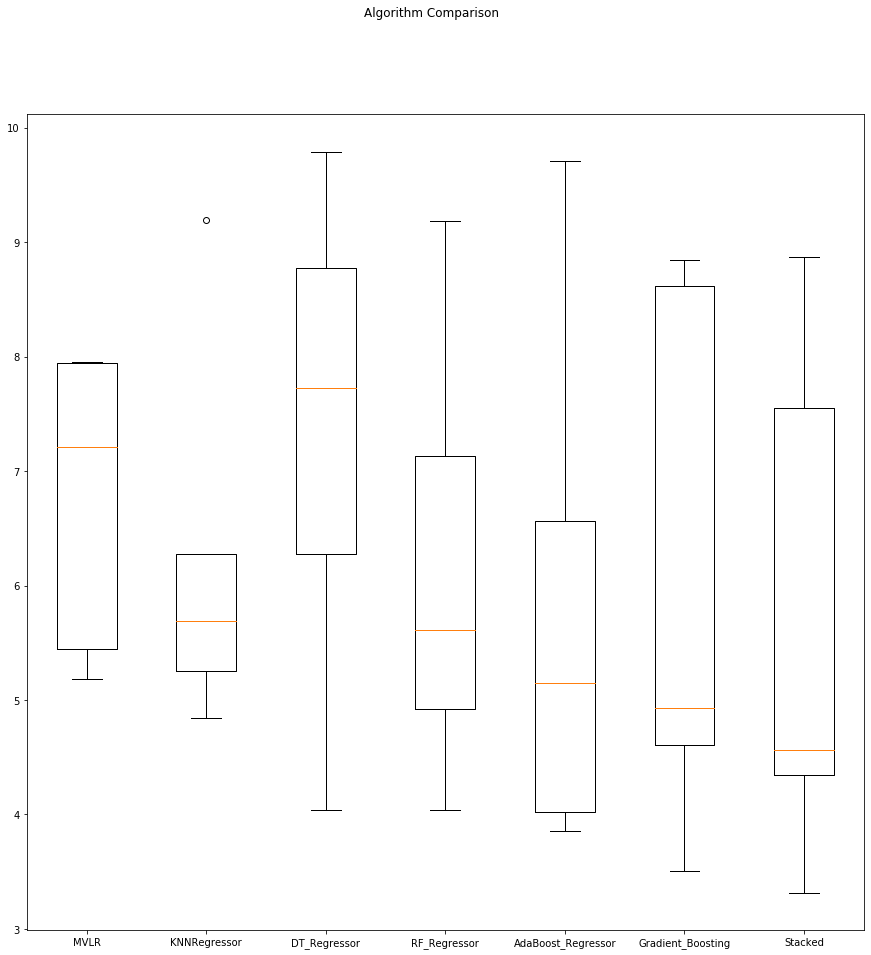

In [194]:
fig = plt.figure(figsize=(15,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Quadratic Regression Outperforms remaining model